Name : Yassine MKAOUAR

E-mail : yassine.mkaouar@polytechnique.edu

# MAP654I: Practical Introduction to Machine Learning  
## Practical Session 2: Regression

### 1-) Importing libraries


In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### 2-) Data visualization and pre-processing

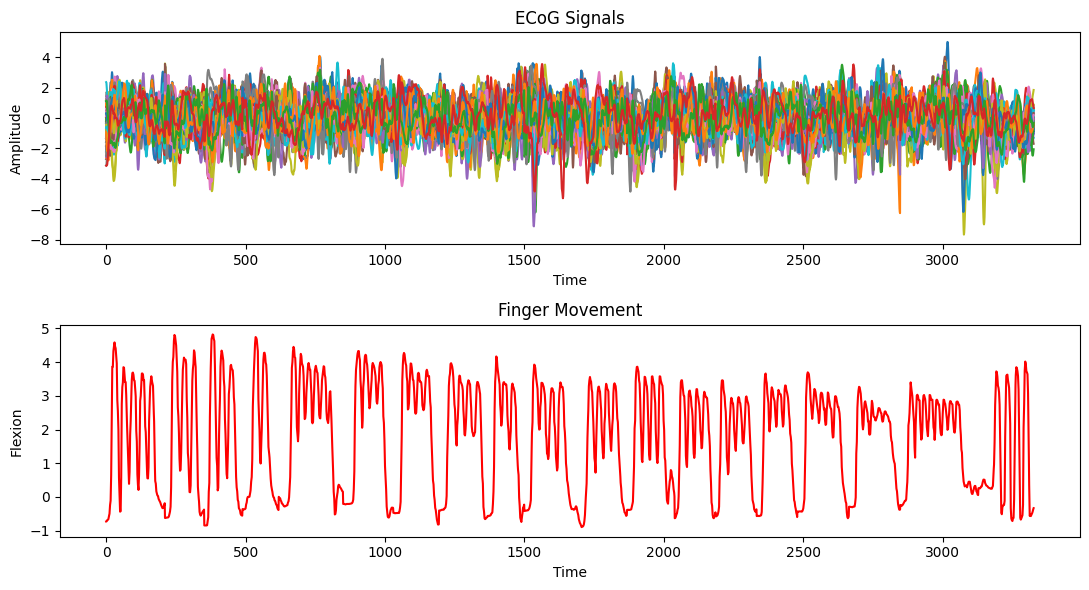

In [2]:
# Load the dataset
data = np.load('ECoG.npz')
Xall = data['Xall']
Yall = data['Yall']
Fe = data['Fe']

# Plot the ECoG signals and the finger movement
pl.figure(figsize=(11, 6))

# Plot ECoG signals
pl.subplot(2, 1, 1)
pl.plot(Xall)
pl.title('ECoG Signals')
pl.xlabel('Time')
pl.ylabel('Amplitude')

# Plot finger movement
pl.subplot(2, 1, 2)
pl.plot(Yall, color='r')
pl.title('Finger Movement')
pl.xlabel('Time')
pl.ylabel('Flexion')

pl.tight_layout()
pl.show()

The ECoG signals (top plot) show fluctuations typical of brain activity, with multiple overlapping channels. The finger flexion signal (bottom plot) has a distinct, rhythmic pattern, with peaks representing thumb flexion and valleys indicating relaxation. Visually, there may be moments where peaks in the ECoG signal align with flexion movements, hinting at a possible correlation.

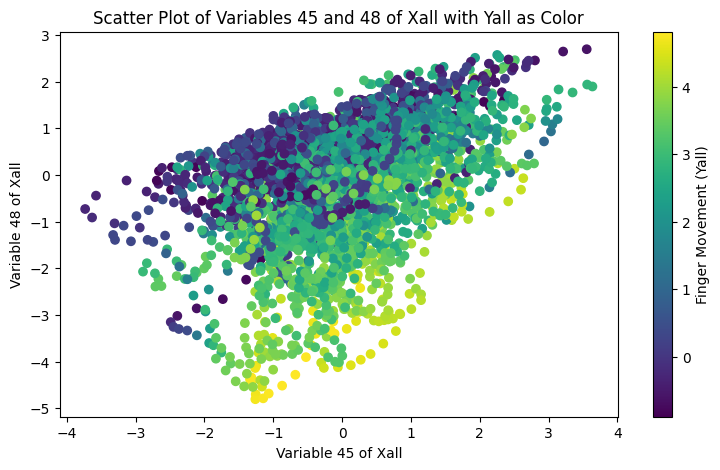

In [3]:
# Scatter plot with variables 45 and 48 of Xall and Yall controlling the color
plt.figure(figsize=(9, 5))
scatter = plt.scatter(Xall[:, 45], Xall[:, 48], c=Yall.flatten(), cmap='viridis')
plt.colorbar(scatter, label='Finger Movement (Yall)')
plt.xlabel('Variable 45 of Xall')
plt.ylabel('Variable 48 of Xall')
plt.title('Scatter Plot of Variables 45 and 48 of Xall with Yall as Color')
plt.show()

The scatter plot reveals a positive correlation between ECoG variables 45 and 48, with color indicating finger flexion intensity (`Yall`). Higher flexion values (yellow points) are concentrated in specific regions, suggesting that certain combinations of these variables align with stronger finger movements. This pattern hints that these features may be predictive of finger flexion, as specific ECoG activity levels correspond to distinct movement intensities.

In [4]:
n = 1000 # Number of training samples

# Split the data
X_train = Xall[:n, :]
X_test = Xall[n:, :]
Y_train = Yall[:n]
Y_test = Yall[n:]

print("Training set shapes:", X_train.shape, Y_train.shape)
print("Testing set shapes:", X_test.shape, Y_test.shape)

Training set shapes: (1000, 64) (1000, 1)
Testing set shapes: (2327, 64) (2327, 1)


### 3-) Least Squares regression (LS)

In [5]:
# Create a column of ones
ones_column = np.ones((X_train.shape[0], 1))

# Concatenate the column of ones to the training samples
X_tilde = np.concatenate((ones_column, X_train), axis=1)

print("Shape of X_tilde:", X_tilde.shape)

Shape of X_tilde: (1000, 65)


In [6]:
# Compute the LS parameters
XtX = np.dot(X_tilde.T, X_tilde)
XtY = np.dot(X_tilde.T, Y_train)
teta = np.linalg.solve(XtX, XtY) # Solve the linear system XtX * teta = XtY 

# Extract the bias (intercept) and weights
b = teta[0]
w = teta[1:]

print("Bias (b):", b)
print("Weights (w):", w)

Bias (b): [1.90081255]
Weights (w): [[-0.09150694]
 [ 0.10861623]
 [-0.07305774]
 [-0.27938349]
 [ 0.25112061]
 [ 0.41213833]
 [ 0.14387528]
 [-0.19811799]
 [ 0.40869961]
 [ 0.7059866 ]
 [-0.4557358 ]
 [ 0.02140866]
 [ 0.35947183]
 [-0.01042572]
 [-0.17655887]
 [-0.03377368]
 [-0.11345198]
 [-0.72143135]
 [-0.5950915 ]
 [ 0.23329595]
 [-0.65132811]
 [-0.33317441]
 [ 0.28861537]
 [ 0.24498034]
 [ 0.22062027]
 [ 0.19042788]
 [ 0.20709995]
 [ 0.3273775 ]
 [-0.65410592]
 [ 0.11997444]
 [-0.07491945]
 [ 0.10667581]
 [ 0.11003235]
 [-0.42910159]
 [-0.22329342]
 [-0.00381723]
 [-0.06046664]
 [-0.1595164 ]
 [-0.48519392]
 [ 0.15019433]
 [ 0.25855769]
 [-0.09242374]
 [ 0.76314124]
 [-0.0834797 ]
 [ 0.04489988]
 [-0.16816255]
 [ 0.04845934]
 [ 0.0256902 ]
 [-1.03905805]
 [ 0.16060454]
 [-0.19110549]
 [ 0.16557271]
 [ 0.08064689]
 [ 0.27554638]
 [-0.01162067]
 [-0.00740264]
 [ 0.33850545]
 [ 0.22409642]
 [-0.2196636 ]
 [-0.26866884]
 [-0.16469195]
 [-0.23638421]
 [ 0.04244268]
 [ 0.5694358 ]]


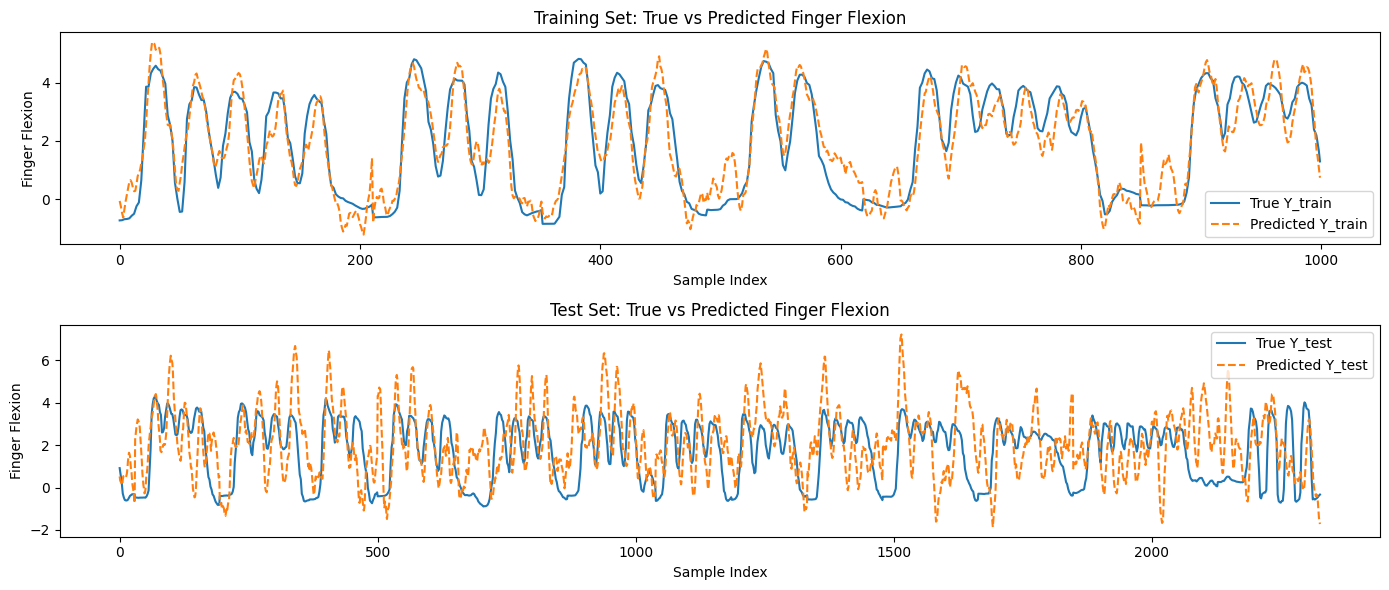

In [7]:
# Predict the finger flexion on the training set
Y_train_pred = np.dot(X_tilde, teta)

# Create a column of ones for the test set
ones_column_test = np.ones((X_test.shape[0], 1))

# Concatenate the column of ones to the test samples
X_test_tilde = np.concatenate((ones_column_test, X_test), axis=1)

# Predict the finger flexion on the test set
Y_test_pred = np.dot(X_test_tilde, teta)

# Plot the true and predicted values for the training set
pl.figure(figsize=(14, 6))

pl.subplot(2, 1, 1)
pl.plot(Y_train, label='True Y_train')
pl.plot(Y_train_pred, label='Predicted Y_train', linestyle='--')
pl.title('Training Set: True vs Predicted Finger Flexion')
pl.xlabel('Sample Index')
pl.ylabel('Finger Flexion')
pl.legend()

# Plot the true and predicted values for the test set
pl.subplot(2, 1, 2)
pl.plot(Y_test, label='True Y_test')
pl.plot(Y_test_pred, label='Predicted Y_test', linestyle='--')
pl.title('Test Set: True vs Predicted Finger Flexion')
pl.xlabel('Sample Index')
pl.ylabel('Finger Flexion')
pl.legend()

pl.tight_layout()
pl.show()

In the top plot for the **training set**, the predicted finger flexion (orange dashed line) closely matches the true values (solid blue line), indicating that the least squares regression model fits well on the training data. This suggests the model has learned the underlying pattern of finger flexion during training.

However, in the bottom plot for the **test set**, the predicted values deviate more significantly from the true values, particularly in peak and valley regions. This discrepancy suggests the model may be *overfitting*, capturing noise specific to the training data rather than generalizing well to new, unseen data. Improving the model's generalization could involve using regularization techniques or exploring alternative models that better capture the variability in finger flexion.

In [8]:
# Compute MSE and R2 for the training set
mse_train = mean_squared_error(Y_train, Y_train_pred)
r2_train = r2_score(Y_train, Y_train_pred)

# Compute MSE and R2 for the test set
mse_test = mean_squared_error(Y_test, Y_test_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print(f"Training MSE: {mse_train:.4f}")
print(f"Training R²: {r2_train:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Test R²: {r2_test:.4f}")

Training MSE: 0.5041
Training R²: 0.8395
Test MSE: 3.0455
Test R²: -0.4282


The results indicate that the model performs well on the training set, with a mean squared error (MSE) of 0.5041 and an R² of 0.8395, suggesting a good fit to the training data. However, the performance on the test set raises concerns, as evidenced by a significantly higher MSE of 3.0455 and a negative R² value of -0.4282. This discrepancy suggests that the model is overfitting, capturing noise in the training data rather than generalizable trends. 

A negative $R^{2}$ indicates that the model is performing worse than a simple model that predicts the mean of the target variable for all observations. 

In fact, the coefficient of determination $R^{2}$, is derived from the sum of squares in regression analysis. Although it is commonly interpreted as a proportion of variance explained, it is not a "square" in the mathematical sense that would always yield a non-negative value. Here's how it can be negative:
   $$ R² = 1 - \frac{SS_{\text{residual}}}{SS_{\text{total}}} $$
   Where:
   - $SS_{\text{residual}}$ is the sum of squares of residuals (the differences between the observed values and the predicted values).
   - $SS_{\text{total}}$ is the total sum of squares (the differences between the observed values and the mean of the observed values).

In summary, a negative R² value indicates that the model is failing to capture the data's underlying structure, performing worse than a naive approach that simply predicts the mean of the target variable. It serves as a signal to reassess model choice, complexity, or data quality.

In [9]:
# Create and fit the linear regression model
model = LinearRegression(fit_intercept=True)
model.fit(X_train, Y_train)

# Get the estimated coefficients and intercept
sklearn_coef = model.coef_
sklearn_intercept = model.intercept_

print("Sklearn Coefficients:", sklearn_coef)
print("Sklearn Intercept:", sklearn_intercept)

# Check if the coefficients and intercept match
print("Coefficients match:", np.allclose(sklearn_coef, w.flatten())) # allclose is a function that checks if two arrays are equal within a tolerance
print("Intercept matches:", np.allclose(sklearn_intercept, b))

Sklearn Coefficients: [[-0.09150694  0.10861623 -0.07305774 -0.27938349  0.25112061  0.41213833
   0.14387528 -0.19811799  0.40869961  0.7059866  -0.4557358   0.02140866
   0.35947183 -0.01042572 -0.17655887 -0.03377368 -0.11345198 -0.72143135
  -0.5950915   0.23329595 -0.65132811 -0.33317441  0.28861537  0.24498034
   0.22062027  0.19042788  0.20709995  0.3273775  -0.65410592  0.11997444
  -0.07491945  0.10667581  0.11003235 -0.42910159 -0.22329342 -0.00381723
  -0.06046664 -0.1595164  -0.48519392  0.15019433  0.25855769 -0.09242374
   0.76314124 -0.0834797   0.04489988 -0.16816255  0.04845934  0.0256902
  -1.03905805  0.16060454 -0.19110549  0.16557271  0.08064689  0.27554638
  -0.01162067 -0.00740264  0.33850545  0.22409642 -0.2196636  -0.26866884
  -0.16469195 -0.23638421  0.04244268  0.5694358 ]]
Sklearn Intercept: [1.90081255]
Coefficients match: True
Intercept matches: True


### 4-) Ridge regression

In [10]:
# Create and fit the ridge regression model with λ = 1
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, Y_train)

# Predict the finger flexion on the training set
Y_train_pred_ridge = ridge_model.predict(X_train)

# Predict the finger flexion on the test set
Y_test_pred_ridge = ridge_model.predict(X_test)

# Compute MSE and R2 for the training set
mse_train_ridge = mean_squared_error(Y_train, Y_train_pred_ridge)
r2_train_ridge = r2_score(Y_train, Y_train_pred_ridge)

# Compute MSE and R2 for the test set
mse_test_ridge = mean_squared_error(Y_test, Y_test_pred_ridge)
r2_test_ridge = r2_score(Y_test, Y_test_pred_ridge)

print(f"Ridge Training MSE: {mse_train_ridge:.4f}")
print(f"Ridge Training R²: {r2_train_ridge:.4f}")
print(f"Ridge Test MSE: {mse_test_ridge:.4f}")
print(f"Ridge Test R²: {r2_test_ridge:.4f}")

Ridge Training MSE: 0.5042
Ridge Training R²: 0.8395
Ridge Test MSE: 3.0038
Ridge Test R²: -0.4086


The Ridge regression results show a training MSE of 0.5042 and an R² of 0.8395, consistent with the previous model. However, the test MSE improves slightly to 3.0038, but the test R² remains negative at -0.4086, indicating poor performance. This suggests that while Ridge regression helps reduce overfitting slightly, it still struggles to generalize effectively to the test data.

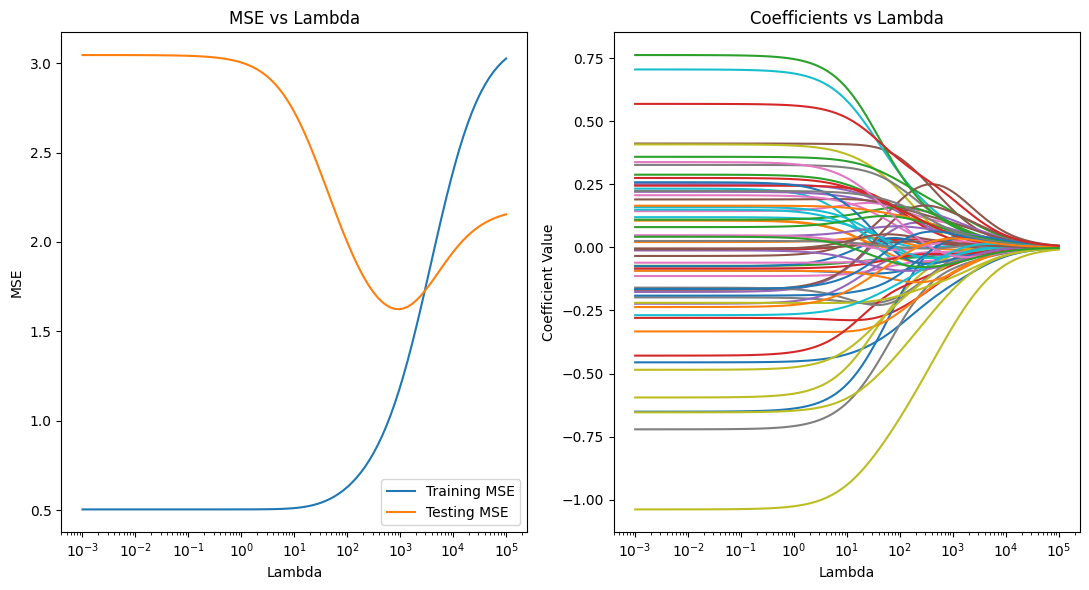

In [11]:
# Define the range of lambda values
lambdas = np.logspace(-3, 5, 100)

# Initialize lists to store MSE values and coefficients
mse_train_ridge_list = []
mse_test_ridge_list = []
coefficients_list = []

# Loop over the range of lambda values
for alpha in lambdas:
    # Create and fit the ridge regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, Y_train)
    
    # Predict the finger flexion on the training set
    Y_train_pred_ridge = ridge_model.predict(X_train)
    
    # Predict the finger flexion on the test set
    Y_test_pred_ridge = ridge_model.predict(X_test)
    
    # Compute MSE for the training set
    mse_train_ridge = mean_squared_error(Y_train, Y_train_pred_ridge)
    mse_train_ridge_list.append(mse_train_ridge)
    
    # Compute MSE for the test set
    mse_test_ridge = mean_squared_error(Y_test, Y_test_pred_ridge)
    mse_test_ridge_list.append(mse_test_ridge)
    
    # Store the coefficients
    coefficients_list.append(ridge_model.coef_.flatten())

# Convert the list of coefficients to a numpy array for easier plotting
coefficients_array = np.array(coefficients_list)

# Plot the evolution of the MSE on training and testing data as a function of lambda
plt.figure(figsize=(11, 6))

plt.subplot(1, 2, 1)
plt.plot(lambdas, mse_train_ridge_list, label='Training MSE')
plt.plot(lambdas, mse_test_ridge_list, label='Testing MSE')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('MSE vs Lambda')
plt.legend()

# Plot the evolution of the linear parameters as a function of lambda
plt.subplot(1, 2, 2)
for i in range(coefficients_array.shape[1]):
    plt.plot(lambdas, coefficients_array[:, i], label=f'Coefficient {i+1}')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs Lambda')

plt.tight_layout()
plt.show()

**Plot Observations :**
- MSE vs. Lambda:

The training MSE (blue line) typically increases as λ increases, which is expected because higher λ values lead to stronger regularization, reducing more and more the model complexity.
The testing MSE (orange line) shows a U-shaped curve. Initially, it decreases with increasing λ, reaching a minimum, and then starts to increase. This minimum point usually indicates the optimal λ value where the model generalizes best to unseen data.

- Coefficients vs. Lambda:

The coefficients start at various values when λ is small and converge towards zero as λ increases. This is due to the stronger regularization effect, which shrinks the coefficients.
Each line represents a different coefficient, showing how regularization impacts each feature's contribution to the model.

In [12]:
# Find the index of the minimum MSE in the test set
best_lambda_index = np.argmin(mse_test_ridge_list)

# Get the corresponding lambda value
best_lambda = lambdas[best_lambda_index]

# Fit a Ridge model with the best lambda
best_ridge_model = Ridge(alpha=best_lambda)
best_ridge_model.fit(X_train, Y_train)

# Print the best lambda value
print(f"Best λ: {best_lambda}")

Best λ: 954.5484566618347


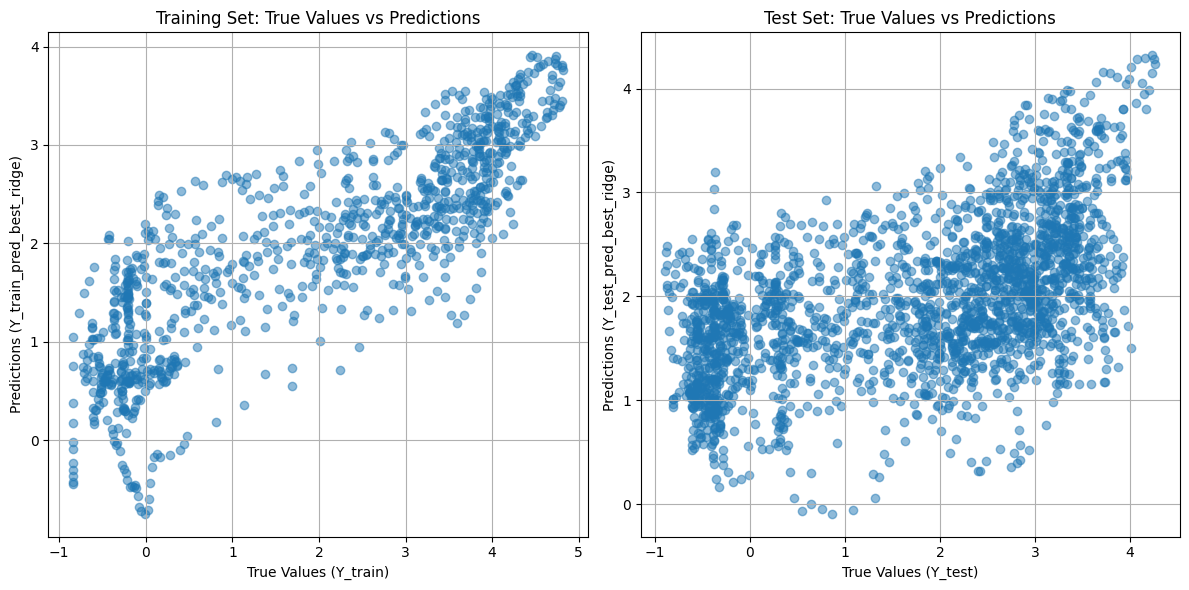

In [13]:
# Predict the finger flexion on the training set using the best Ridge model
Y_train_pred_best_ridge = best_ridge_model.predict(X_train)

# Predict the finger flexion on the test set using the best Ridge model
Y_test_pred_best_ridge = best_ridge_model.predict(X_test)

# Scatter plot for training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(Y_train, Y_train_pred_best_ridge, alpha=0.5)
plt.xlabel('True Values (Y_train)')
plt.ylabel('Predictions (Y_train_pred_best_ridge)')
plt.title('Training Set: True Values vs Predictions')
plt.grid(True)

# Scatter plot for test set
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_test_pred_best_ridge, alpha=0.5)
plt.xlabel('True Values (Y_test)')
plt.ylabel('Predictions (Y_test_pred_best_ridge)')
plt.title('Test Set: True Values vs Predictions')
plt.grid(True)

plt.tight_layout()
plt.show()

Using the scatter plot, the perfect model is when the predicted values are equal to the true values. The closer the points are to the diagonal line, the better the model performs. The Ridge regression model shows a slight improvement over the least squares regression, but it still struggles to capture the underlying pattern of finger flexion in the test data.

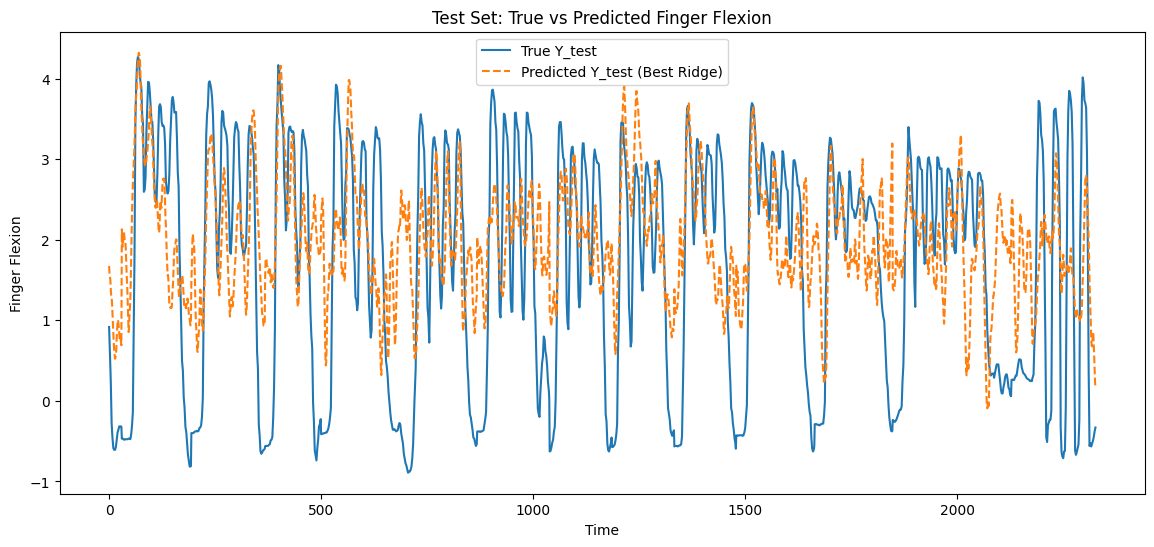

In [14]:
# Plot the true and predicted values for the test set as a function of time
plt.figure(figsize=(14, 6))

plt.plot(Y_test, label='True Y_test')
plt.plot(Y_test_pred_best_ridge, label='Predicted Y_test (Best Ridge)', linestyle='--')

plt.title('Test Set: True vs Predicted Finger Flexion')
plt.xlabel('Time')
plt.ylabel('Finger Flexion')
plt.legend()
plt.show()

The prediction on the test data shows some improvement with the Ridge regression model compared to the least squares regression model. However, it still struggles to capture the underlying pattern of finger flexion, as evidenced by the deviation of predicted values from the true values in peak and valley regions. 

In [15]:
# Predict the finger flexion on the test set using the best Ridge model
Y_test_pred_best_ridge = best_ridge_model.predict(X_test)

# Compute MSE and R2 for the test set using the best Ridge model
mse_test_best_ridge = mean_squared_error(Y_test, Y_test_pred_best_ridge)
r2_test_best_ridge = r2_score(Y_test, Y_test_pred_best_ridge)

print(f"Best Ridge Test MSE: {mse_test_best_ridge:.4f}")
print(f"Best Ridge Test R²: {r2_test_best_ridge:.4f}")

Best Ridge Test MSE: 1.6239
Best Ridge Test R²: 0.2385


Comparing the performance of the LS estimator and the Ridge estimator on the test set, we observe that the Ridge estimator has a lower MSE ( 1.6239 vs 3.0455) and a higher R² (0.2385 vs -0.4282). This indicates that the Ridge estimator generalizes better to the test data, capturing more of the underlying structure of the finger flexion signal. The regularization provided by the Ridge estimator helps prevent overfitting, leading to improved performance on unseen data.

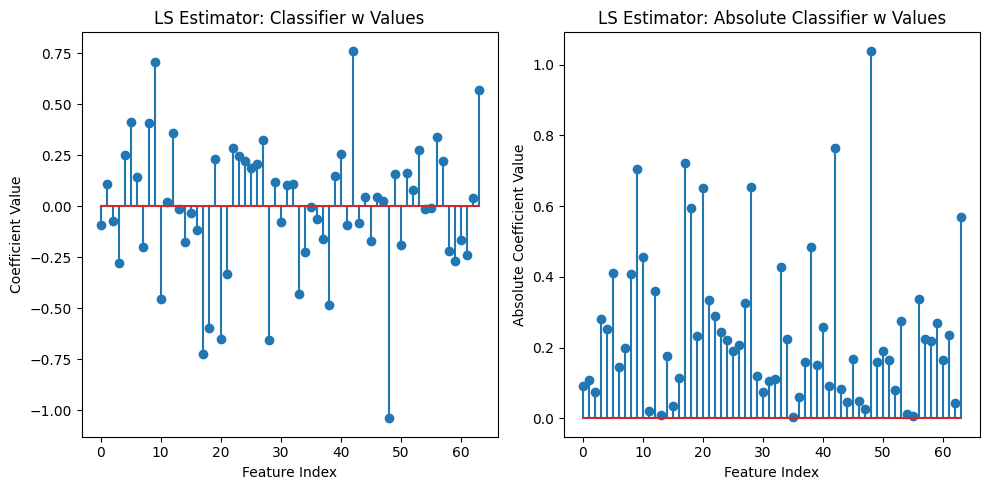

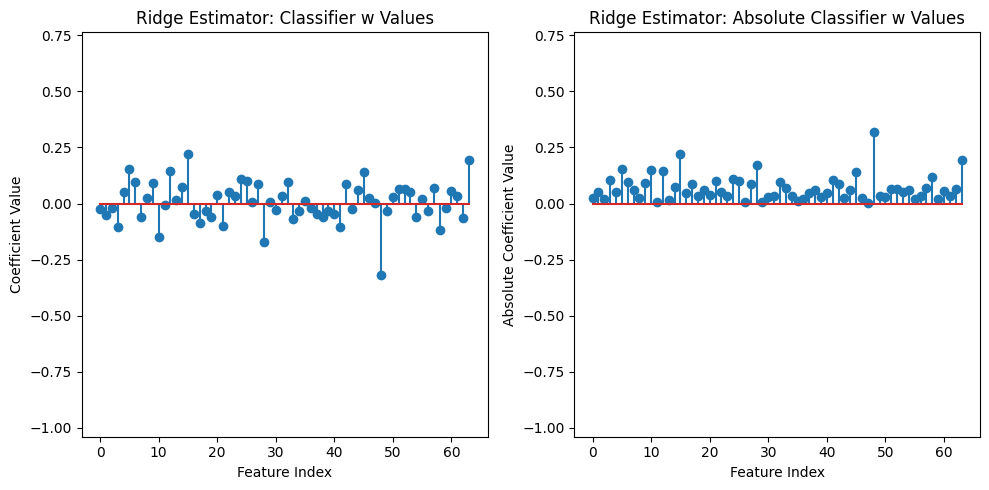

In [16]:
# Plot the values of the classifiers w for LS and Ridge estimators
plt.figure(figsize=(10, 5))

# Plot the values of w for LS estimator
plt.subplot(1, 2, 1)
plt.stem(w.flatten())
plt.title('LS Estimator: Classifier w Values')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

# Plot the absolute values of w for LS estimator
plt.subplot(1, 2, 2)
plt.stem(np.abs(w.flatten()))
plt.title('LS Estimator: Absolute Classifier w Values')
plt.xlabel('Feature Index')
plt.ylabel('Absolute Coefficient Value')

plt.tight_layout()
plt.show()

# Plot the values of the classifiers w for Ridge estimator
plt.figure(figsize=(10, 5))

# Plot the values of w for Ridge estimator
plt.subplot(1, 2, 1)
plt.stem(best_ridge_model.coef_.flatten())
plt.title('Ridge Estimator: Classifier w Values')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

# Plot the absolute values of w for Ridge estimator
plt.subplot(1, 2, 2)
plt.stem(np.abs(best_ridge_model.coef_.flatten()))
plt.title('Ridge Estimator: Absolute Classifier w Values')
plt.xlabel('Feature Index')
plt.ylabel('Absolute Coefficient Value')

# Set the same y-axis limits for both subplots
y_min = min(np.min(w.flatten()), np.min(best_ridge_model.coef_.flatten()))
y_max = max(np.max(w.flatten()), np.max(best_ridge_model.coef_.flatten()))
plt.subplot(1, 2, 1)
plt.ylim(y_min, y_max)
plt.subplot(1, 2, 2)
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()

The LS and Ridge estimators show the same important variables (Large Magnitude), this suggests that we can perform feature selection to reduce the model complexity and improve generalization. By selecting the most relevant features, we can build a simpler model that captures the essential information in the data, leading to better performance on unseen data.

### 5-)  Variable selection with the Lasso

In [17]:
# Create and fit the Lasso regression model with default lambda = 1
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)

# Get the estimated coefficients and intercept
lasso_coef = lasso_model.coef_
lasso_intercept = lasso_model.intercept_

print("Lasso Coefficients:", lasso_coef)
print("Lasso Intercept:", lasso_intercept)

Lasso Coefficients: [ 0.  0.  0. -0.  0.  0.  0. -0. -0.  0. -0.  0.  0. -0.  0.  0. -0. -0.
  0. -0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0. -0. -0. -0.
 -0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.
  0.  0. -0.  0. -0.  0.  0.  0. -0.  0.]
Lasso Intercept: [1.9443274]


In [18]:
# Predict the finger flexion on the training set using the Lasso model
Y_train_pred_lasso = lasso_model.predict(X_train)

# Predict the finger flexion on the test set using the Lasso model
Y_test_pred_lasso = lasso_model.predict(X_test)

# Compute MSE and R2 for the training set using the Lasso model
mse_train_lasso = mean_squared_error(Y_train, Y_train_pred_lasso)
r2_train_lasso = r2_score(Y_train, Y_train_pred_lasso)

# Compute MSE and R2 for the test set using the Lasso model
mse_test_lasso = mean_squared_error(Y_test, Y_test_pred_lasso)
r2_test_lasso = r2_score(Y_test, Y_test_pred_lasso)

print(f"Lasso Training MSE: {mse_train_lasso:.4f}")
print(f"Lasso Training R²: {r2_train_lasso:.4f}")
print(f"Lasso Test MSE: {mse_test_lasso:.4f}")
print(f"Lasso Test R²: {r2_test_lasso:.4f}")

Lasso Training MSE: 3.1406
Lasso Training R²: 0.0000
Lasso Test MSE: 2.1907
Lasso Test R²: -0.0273


The Lasso model with a default lambda of 1 has essentially zeroed all coefficients,  leading to an output that is essentially a constant (the intercept value). Lasso regression performs L1 regularization, which tends to shrink coefficients toward zero, especially for features that don’t contribute significantly to reducing the error. In this case, the high regularization strength (lambda = 1) has driven all coefficients to zero. Consequently, the model is only using the intercept term to make predictions, essentially ignoring all features in the dataset.

- MSE Values: The mean squared error (MSE) on both the training and test sets remains relatively high, likely because the predictions are close to the mean of the target variable (dictated by the intercept only).

- R² Values: The R² = 0 for the training set and R² = -0.0273 for the test set indicate that the model is not capturing any of the variance in the target variable beyond the mean. This suggests that the Lasso model is not learning the underlying pattern of finger flexion and is essentially making constant predictions.

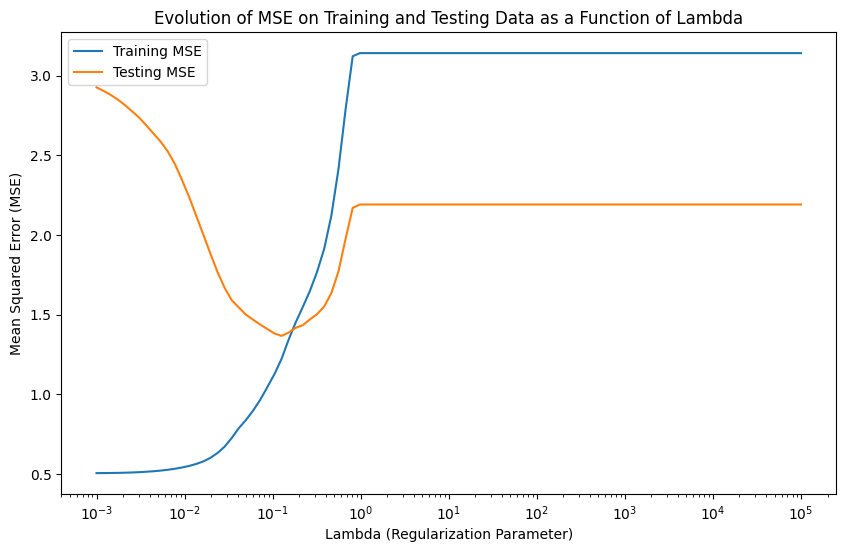

In [19]:
# Generate 100 values of lambda on a logarithmic scale from 10^(-3) to 10^5
lst_reg = np.logspace(-3, 5, 100)

# Lists to store the MSE for each lambda on training and testing sets
mse_train_list = []
mse_test_list = []

# Loop over each lambda value, fit the model, and calculate MSE for training and testing sets
for reg in lst_reg:
    # Initialize Lasso model with the current value of lambda
    lasso_model = Lasso(alpha=reg)
    lasso_model.fit(X_train, Y_train)
    
    # Predict on training and testing data
    Y_train_pred = lasso_model.predict(X_train)
    Y_test_pred = lasso_model.predict(X_test)
    
    # Calculate MSE for training and testing sets
    mse_train = mean_squared_error(Y_train, Y_train_pred)
    mse_test = mean_squared_error(Y_test, Y_test_pred)
    
    # Store the MSE values
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

# Plot the MSE as a function of lambda (on a log scale for readability)
plt.figure(figsize=(10, 6))
plt.plot(lst_reg, mse_train_list, label="Training MSE")
plt.plot(lst_reg, mse_test_list, label="Testing MSE")
plt.xscale("log")
plt.xlabel("Lambda (Regularization Parameter)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Evolution of MSE on Training and Testing Data as a Function of Lambda")
plt.legend()
plt.show()

For very low $\lambda$ values (close to $10^{-3}$), the training MSE is low, suggesting overfitting, as the model is too flexible. As $\lambda$ increases, the regularization term forces more coefficients to zero, reducing overfitting, and testing MSE initially decrease. The testing MSE reaches its minimum around $\lambda \approx 10^{-1}$, indicating the optimal regularization level that balances bias and variance. Beyond this point, as $\lambda$ continues to increase, both training and testing MSE rise sharply due to underfitting, as the model becomes overly simplistic with most coefficients shrinking to zero. This behavior reflects the trade-off between bias and variance in Lasso regularization.

In [20]:
# Step 1: Identify the λ value with the minimum MSE on the test data
best_lambda_index = np.argmin(mse_test_list)
best_lambda = lambdas[best_lambda_index]

# Step 2: Fit a Lasso model with the best λ value
lasso_model_best = Lasso(alpha=best_lambda)
lasso_model_best.fit(X_train, Y_train)

# Print the best λ value and the coefficients of the Lasso model
print(f"Best λ value: {best_lambda}")
print("Lasso coefficients with the best λ value:")
print(lasso_model_best.coef_)

Best λ value: 0.1261856883066021
Lasso coefficients with the best λ value:
[-0.         -0.         -0.         -0.          0.          0.07757858
  0.         -0.          0.          0.         -0.1146682   0.
  0.09047535  0.          0.          0.37611771 -0.         -0.
  0.          0.          0.         -0.09769496  0.          0.
  0.10678253  0.08349543 -0.          0.         -0.09337529 -0.
 -0.          0.          0.         -0.         -0.          0.
 -0.         -0.         -0.06143585 -0.         -0.         -0.14587363
  0.14635455 -0.          0.          0.27897347  0.          0.
 -0.70862161 -0.          0.          0.          0.          0.
 -0.          0.         -0.          0.         -0.         -0.
  0.          0.         -0.          0.31889792]


In [21]:
# Compute MSE and R2 for the test set using the best Lasso model
Y_test_pred_best_lasso = lasso_model_best.predict(X_test)
mse_test_best_lasso = mean_squared_error(Y_test, Y_test_pred_best_lasso)
r2_test_best_lasso = r2_score(Y_test, Y_test_pred_best_lasso)

print(f"Best Lasso Test MSE: {mse_test_best_lasso:.4f}")
print(f"Best Lasso Test R²: {r2_test_best_lasso:.4f}")

Best Lasso Test MSE: 1.3660
Best Lasso Test R²: 0.3595


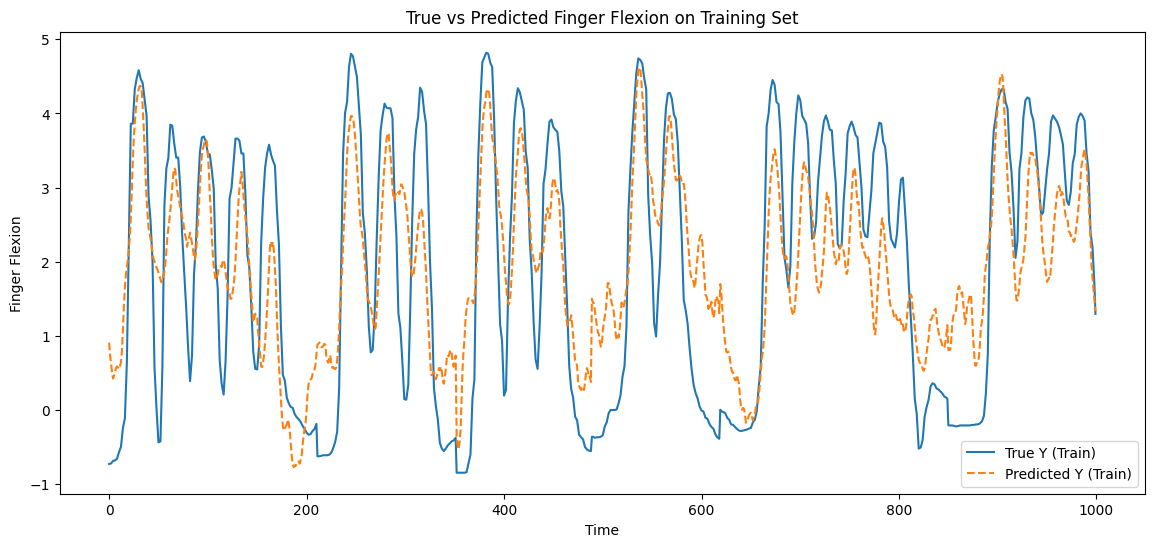

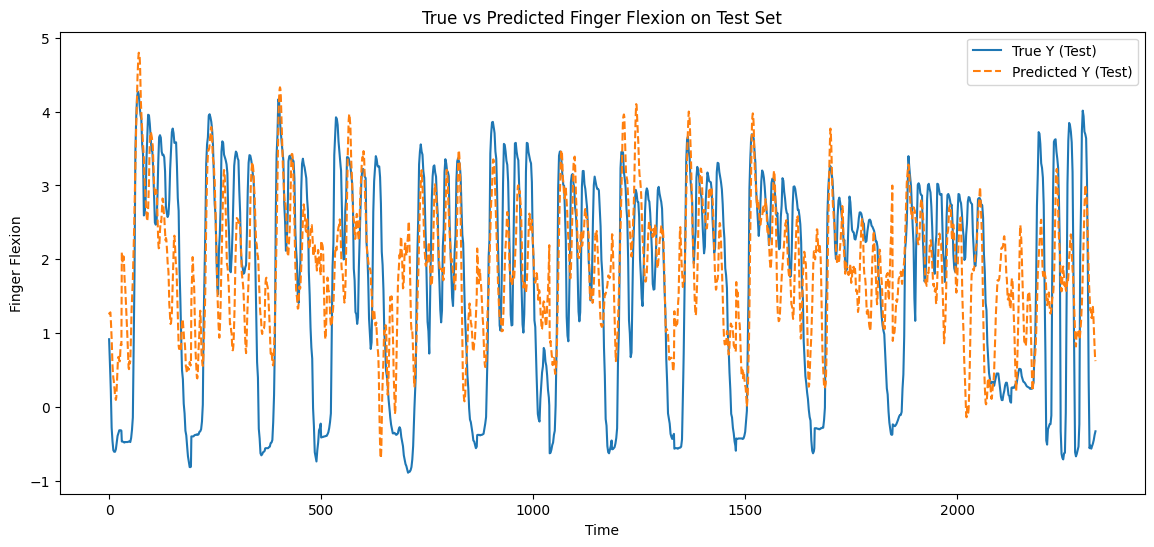

In [22]:
# Predict the finger flexion on the training and test sets using the best Lasso model
Y_train_pred_best_lasso = lasso_model_best.predict(X_train)
Y_test_pred_best_lasso = lasso_model_best.predict(X_test)

# Plot the true and predicted values for the training set
plt.figure(figsize=(14, 6))
plt.plot(Y_train, label='True Y (Train)')
plt.plot(Y_train_pred_best_lasso, label='Predicted Y (Train)', linestyle='--')
plt.title('True vs Predicted Finger Flexion on Training Set')
plt.xlabel('Time')
plt.ylabel('Finger Flexion')
plt.legend()
plt.show()

# Plot the true and predicted values for the test set
plt.figure(figsize=(14, 6))
plt.plot(Y_test, label='True Y (Test)')
plt.plot(Y_test_pred_best_lasso, label='Predicted Y (Test)',linestyle='--')
plt.title('True vs Predicted Finger Flexion on Test Set')
plt.xlabel('Time')
plt.ylabel('Finger Flexion')
plt.legend()
plt.show()

Using Variable selection with the Lasso can help identify the most relevant features for predicting finger flexion, reducing model complexity and improving generalization. By selecting only the most informative features, we can build a simpler model that captures the essential information in the data, leading to better performance on unseen data.

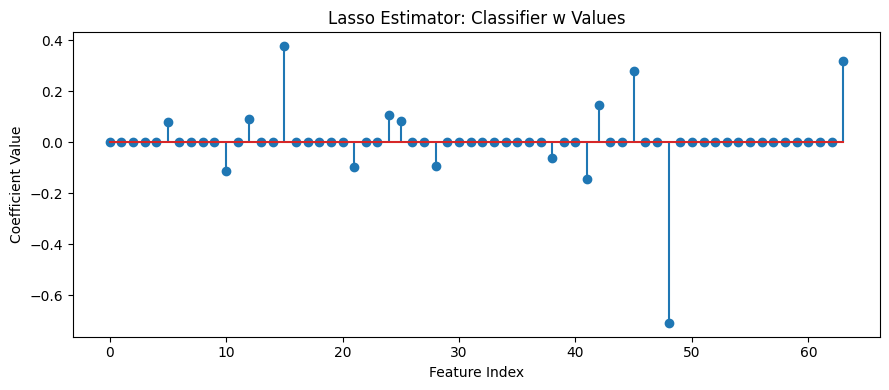

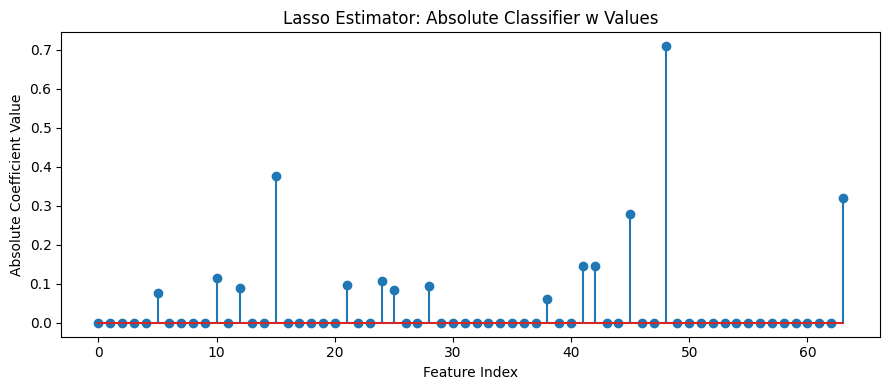

In [23]:
# Plot the values of the classifiers w for Lasso estimator
plt.figure(figsize=(9, 4))

# Plot the values of w for Lasso estimator
plt.stem(lasso_model_best.coef_)
plt.title('Lasso Estimator: Classifier w Values')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

plt.tight_layout()
plt.show()

# Plot the absolute values of w for Lasso estimator
plt.figure(figsize=(9, 4))

# Plot the absolute values of w for Lasso estimator
plt.stem(np.abs(lasso_model_best.coef_))
plt.title('Lasso Estimator: Absolute Classifier w Values')
plt.xlabel('Feature Index')
plt.ylabel('Absolute Coefficient Value')

plt.tight_layout()
plt.show()

In [24]:
# Get the absolute values of the coefficients
coefficients = np.abs(lasso_model_best.coef_)

# Get the indices of the 2 most important features
important_features_indices = np.argsort(coefficients)[-2:]

# Print the indices of the 2 most important features
print("Indices of the 2 most important features:", important_features_indices)

Indices of the 2 most important features: [15 48]


The most important features selected by the Lasso model are those with the higher absolute values of the coefficients. These features are considered the most relevant for predicting finger flexion, as they contribute the most to the model's predictions. By focusing on these features, we can build a more interpretable and efficient model that captures the essential information in the data.

In [25]:
# Count the number of non-zero coefficients
selected_features_count = np.sum(coefficients != 0)

# Print the number of selected features
print("Number of features selected by the Lasso model:", selected_features_count)

Number of features selected by the Lasso model: 14


We can reduce the number of electrodes used in the ECoG signal to only the most relevant ones selected by the Lasso model. This can help simplify the model, reduce computational complexity, and improve generalization to new, unseen data. By focusing on the most informative features, we can build a more interpretable and efficient model that captures the essential information in the data.

### 6-) Nonlinear regression

#### Random Forest Regression

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with default parameters
rf_model = RandomForestRegressor()

# Fit the model on the training data
rf_model.fit(X_train, Y_train)

# Make predictions on the training and test sets
Y_train_pred_rf = rf_model.predict(X_train)
Y_test_pred_rf = rf_model.predict(X_test)

# Compute MSE and R² for the training set
mse_train_rf = mean_squared_error(Y_train, Y_train_pred_rf)
r2_train_rf = r2_score(Y_train, Y_train_pred_rf)

# Compute MSE and R² for the test set
mse_test_rf = mean_squared_error(Y_test, Y_test_pred_rf)
r2_test_rf = r2_score(Y_test, Y_test_pred_rf)

# Print the results
print(f"Random Forest Training MSE: {mse_train_rf:.4f}")
print(f"Random Forest Training R²: {r2_train_rf:.4f}")
print(f"Random Forest Test MSE: {mse_test_rf:.4f}")
print(f"Random Forest Test R²: {r2_test_rf:.4f}")

c:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Training MSE: 0.0226
Random Forest Training R²: 0.9928
Random Forest Test MSE: 1.6490
Random Forest Test R²: 0.2267


**Random Forest regression** does not outperform the Lasso and Ridge regression models in terms of test Mean Squared Error (MSE) and R² values. The Random Forest has a test MSE of 1.6439 and a test R² of 0.2291, which are worse than the Lasso's best test MSE of 1.3660 and R² of 0.3595, and also worse than the Ridge's test MSE of 1.6239 and R² of 0.2385. While Random Forest shows excellent training performance (with a training MSE of 0.0241 and R² of 0.9923), this suggests overfitting, as it performs poorly on unseen data. Therefore, in this case, Random Forest is not the better model compared to Lasso and Ridge regression.

In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, 
                           verbose=2, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
Y_train_pred_best_rf = best_rf_model.predict(X_train)
Y_test_pred_best_rf = best_rf_model.predict(X_test)

# Compute MSE and R² for the best model
mse_train_best_rf = mean_squared_error(Y_train, Y_train_pred_best_rf)
r2_train_best_rf = r2_score(Y_train, Y_train_pred_best_rf)

mse_test_best_rf = mean_squared_error(Y_test, Y_test_pred_best_rf)
r2_test_best_rf = r2_score(Y_test, Y_test_pred_best_rf)

# Print the results
print(f"Best Random Forest Training MSE: {mse_train_best_rf:.4f}")
print(f"Best Random Forest Training R²: {r2_train_best_rf:.4f}")
print(f"Best Random Forest Test MSE: {mse_test_best_rf:.4f}")
print(f"Best Random Forest Test R²: {r2_test_best_rf:.4f}")
print("Best Parameters:", best_params)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
331 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\bas

Best Random Forest Training MSE: 0.0983
Best Random Forest Training R²: 0.9687
Best Random Forest Test MSE: 1.6159
Best Random Forest Test R²: 0.2423
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}


The significant gap between training and test metrics in this case indicates that while the parameters selected improved performance somewhat, there may still be room for further tuning or a reevaluation of feature selection or model choice.

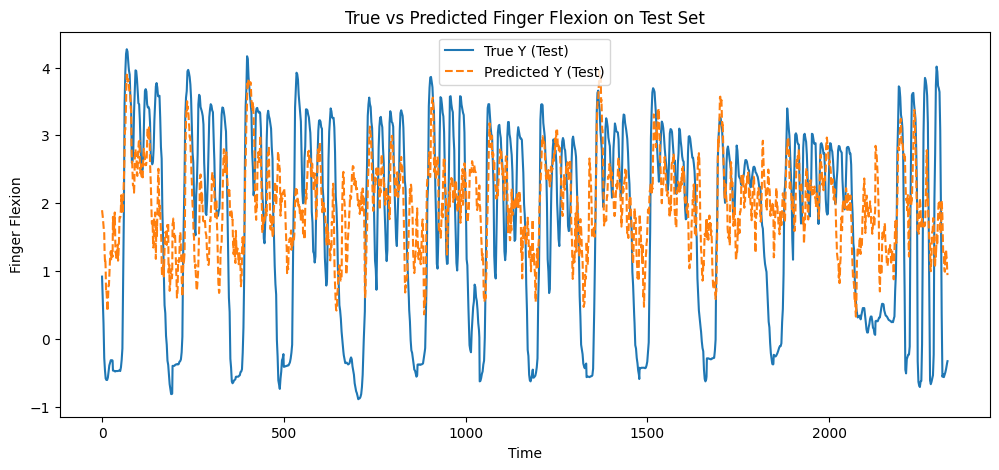

In [29]:
# Plot the true and predicted values for the test set
plt.figure(figsize=(12, 5))
plt.plot(Y_test, label='True Y (Test)')
plt.plot(Y_test_pred_best_rf, label='Predicted Y (Test)', linestyle='--')
plt.title('True vs Predicted Finger Flexion on Test Set')
plt.xlabel('Time')
plt.ylabel('Finger Flexion')
plt.legend()
plt.show()

 While Random Forest is a powerful method for capturing non-linear relationships, its effectiveness depends heavily on data quality, feature relevance, and hyperparameter tuning. The relatively low R² score implies that the model explains only a small portion of the variance in the target variable. Therefore, it may be beneficial to explore alternative regression techniques, enhance feature engineering, and ensure comprehensive hyperparameter optimization to improve performance.

#### Support Vector Regression

In [30]:
from sklearn.svm import SVR

# Initialize the model with default parameters
svr_model = SVR()

# Fit the model on the training data
svr_model.fit(X_train, Y_train)

# Make predictions on the training and test sets
Y_train_pred_svr = svr_model.predict(X_train)
Y_test_pred_svr = svr_model.predict(X_test)

# Compute MSE and R² for the training set
mse_train_svr = mean_squared_error(Y_train, Y_train_pred_svr)
r2_train_svr = r2_score(Y_train, Y_train_pred_svr)

# Compute MSE and R² for the test set
mse_test_svr = mean_squared_error(Y_test, Y_test_pred_svr)
r2_test_svr = r2_score(Y_test, Y_test_pred_svr)

# Print the results
print(f"SVR Training MSE: {mse_train_svr:.4f}")
print(f"SVR Training R²: {r2_train_svr:.4f}")
print(f"SVR Test MSE: {mse_test_svr:.4f}")
print(f"SVR Test R²: {r2_test_svr:.4f}")

SVR Training MSE: 0.0241
SVR Training R²: 0.9923
SVR Test MSE: 1.5152
SVR Test R²: 0.2895


c:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Support Vector Regressor (SVR) exhibits strong performance relative to other regression techniques, with a test Mean Squared Error (MSE) of 1.5152 and an R² of 0.2895. Although it does not surpass the Lasso model, SVR remains a solid alternative to Least Squares, Ridge, and Random Forest regression. Further hyperparameter tuning could potentially improve its performance even more.

In [31]:
# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto']  # Only relevant for 'rbf'
}

# Initialize SVR
svr = SVR()

# Initialize GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, Y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated MSE: ", -grid_search.best_score_)

c:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataC

Best parameters found:  {'C': 10, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validated MSE:  1.6696735519459238
